# Process Missing Value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

## Data Overview

In [2]:
# df = pd.read_csv('/Users/AIFFELthon/final/data/RAWG/RAWG_game_info.csv')
df = pd.read_csv('/Users/guru/data/data.csv')

### 기본 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564100 entries, 0 to 564099
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  564100 non-null  int64  
 1   slug                564098 non-null  object 
 2   name                564097 non-null  object 
 3   description         510867 non-null  object 
 4   metacritic          3969 non-null    float64
 5   released            547003 non-null  object 
 6   tba                 564100 non-null  bool   
 7   background_image    547066 non-null  object 
 8   website             57709 non-null   object 
 9   rating              564100 non-null  float64
 10  added_by_status     69727 non-null   object 
 11  playtime            564100 non-null  int64  
 12  achievements_count  564100 non-null  int64  
 13  reddit_count        564100 non-null  int64  
 14  twitch_count        564100 non-null  int64  
 15  youtube_count       564100 non-nul

### 일부 데이터 확인

In [4]:
df.head()

,id,slug,name,description,metacritic,released,tba,background_image,website,rating,added_by_status,playtime,achievements_count,reddit_count,twitch_count,youtube_count,reviews_text_count,ratings_count,suggestions_count,additions_count,game_series_count,esrb_rating,platforms,genre,tags,developers,publishers,requirements
0,741344,peace-angel,Peace Angel,２０２０年度１年生特進クラス 中村 桃香さんの作品です。天使を操作し、悪魔から死者を守りつつ...,NaN,2022-02-14,False,https://media.rawg.io/media/screenshots/415/41...,NaN,0.0,NaN,0,0,0,0,0,0,0,29,0,0,NaN,PC,Shooter,NaN,神戸電子ゲームソフト分野,NaN,{}
1,374441,brawl-planet,Brawl Planet,Eres un comandante al mando de la nave inteles...,NaN,2019-09-09,False,https://media.rawg.io/media/screenshots/bd6/bd...,NaN,0.0,NaN,0,0,0,0,0,0,0,82,0,0,NaN,Web,Shooter,Singleplayer||Space||shotter,AlexisBot,NaN,{}
2,97470,obelus-arcade-boss-rush,OBELUS - Arcade Boss Rush,"In OBELUS, a bold robot battles three gargantu...",NaN,2018-05-22,False,https://media.rawg.io/media/screenshots/736/73...,NaN,0.0,NaN,0,0,0,0,0,0,0,73,0,0,NaN,PC,Action||Shooter||Platformer,2D||Sci-fi||Pixel Graphics||Destruction||Monst...,3xBlast||BlauwPrint,NaN,{}
3,306287,pimple-popper-lite,Pimple Popper Lite,"Hello, you! We know you're itching for some fi...",NaN,2009-10-12,False,https://media.rawg.io/media/screenshots/be3/be...,http://www.roomcandygames.com,0.0,NaN,0,0,0,0,0,0,0,66,0,0,NaN,iOS,Action||Arcade||Casual,friends||fun||scratch,Room Candy Games,Room Candy Games,"{'minimum': 'iPad 2 Wifi, iPad 2 3G, iPhone 4S..."
4,176964,square-square,SQUARE SQUARE,Left/right arrows - moveUp - restartClick on t...,NaN,2016-04-07,False,https://media.rawg.io/media/screenshots/f26/f2...,NaN,0.0,NaN,0,0,0,0,0,0,0,2,0,0,NaN,PC||macOS||Linux||Web,Action,2D||Score Attack||Black and White,Dmitry Degtyarev,NaN,{}


In [5]:
df.tail()

,id,slug,name,description,metacritic,released,tba,background_image,website,rating,added_by_status,playtime,achievements_count,reddit_count,twitch_count,youtube_count,reviews_text_count,ratings_count,suggestions_count,additions_count,game_series_count,esrb_rating,platforms,genre,tags,developers,publishers,requirements
564095,832426,bomb-squad-magn,Bomb Squad (Magn),Bring the bomb to the exit stairs. Don't blow ...,NaN,2022-08-07,False,https://media.rawg.io/media/screenshots/09e/09...,NaN,0.0,NaN,0,0,0,0,0,0,0,7,0,0,NaN,Web,Puzzle,2D||maze,Magn,NaN,{}
564096,334904,monster-hunter-4,Monster Hunter 4,NaN,NaN,2013-09-14,False,https://media.rawg.io/media/screenshots/ac9/ac...,http://www.capcom.co.jp/monsterhunter/4/,0.0,"{'yet': 1, 'owned': 2, 'beaten': 3, 'toplay': ...",0,0,0,0,0,0,3,61,0,20,NaN,Nintendo 3DS,Action||RPG,exclusive||true exclusive,Capcom Production Studio 1,Capcom,{}
564097,419239,escape-plan-b,Escape Plan B,This is an entry for the 7DRL challenge 2020.\...,NaN,2020-03-09,False,https://media.rawg.io/media/screenshots/4fd/4f...,NaN,0.0,NaN,0,0,0,0,0,0,0,7,0,0,NaN,PC||Linux,Puzzle,Roguelike||challenge,Insane Scatterbrain,NaN,{}
564098,647986,labyrinth-of-evil,Labyrinth of evil,Игра Лабиринт зла. Герою предстоит пройти непр...,NaN,2021-08-12,False,https://media.rawg.io/media/screenshots/489/48...,NaN,0.0,NaN,0,0,0,0,0,0,0,135,0,0,NaN,PC,Puzzle,Singleplayer||2D||Zombies,Sanya2122,NaN,{}
564099,312483,zoxeltd,ZoxelTD,A prototype TD - WIP\npress 1 to 4 to change a...,NaN,2019-04-22,False,https://media.rawg.io/media/screenshots/d3a/d3...,NaN,0.0,NaN,0,0,0,0,0,0,0,128,0,0,NaN,Web,Action,3D,Deus,NaN,{}


## Check and analyze missing values

### 결측치 개수 확인

In [6]:
missing_data_count = df.isna().sum()
print("Missing data count per column:\n", missing_data_count)

Missing data count per column:
 id                         0
slug                       2
name                       3
description            53233
metacritic            560131
released               17097
tba                        0
background_image       17034
website               506391
rating                     0
added_by_status       494373
playtime                   0
achievements_count         0
reddit_count               0
twitch_count               0
youtube_count              0
reviews_text_count         0
ratings_count              0
suggestions_count          0
additions_count            0
game_series_count          0
esrb_rating           519026
platforms               2541
genre                 139386
tags                   62652
developers              6741
publishers            434251
requirements               0
dtype: int64


### 결측치 비율 확인

In [7]:
missing_data_ratio = df.isna().mean() * 100
print("Missing data percentage per column:\n", missing_data_ratio)

Missing data percentage per column:
 id                     0.000000
slug                   0.000355
name                   0.000532
description            9.436802
metacritic            99.296401
released               3.030846
tba                    0.000000
background_image       3.019677
website               89.769722
rating                 0.000000
added_by_status       87.639248
playtime               0.000000
achievements_count     0.000000
reddit_count           0.000000
twitch_count           0.000000
youtube_count          0.000000
reviews_text_count     0.000000
ratings_count          0.000000
suggestions_count      0.000000
additions_count        0.000000
game_series_count      0.000000
esrb_rating           92.009573
platforms              0.450452
genre                 24.709449
tags                  11.106541
developers             1.195001
publishers            76.981209
requirements           0.000000
dtype: float64


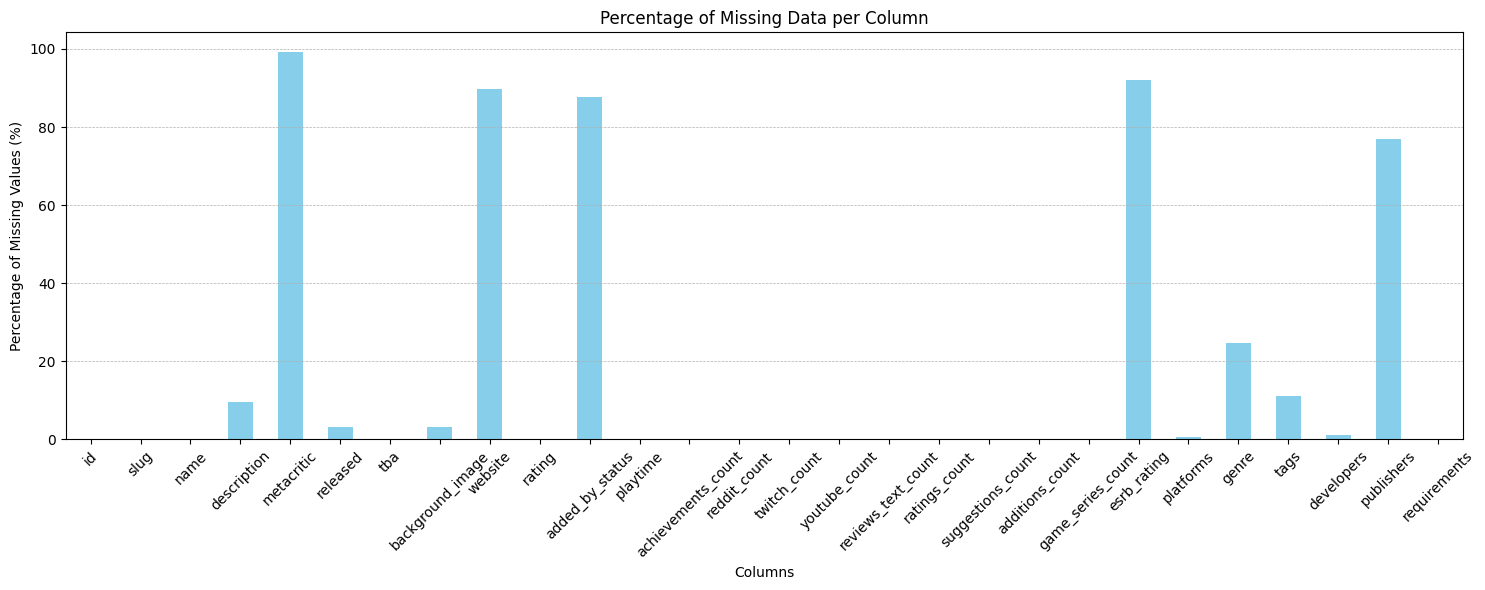

In [8]:
plt.figure(figsize=(15, 6))
missing_data_ratio.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Data per Column')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

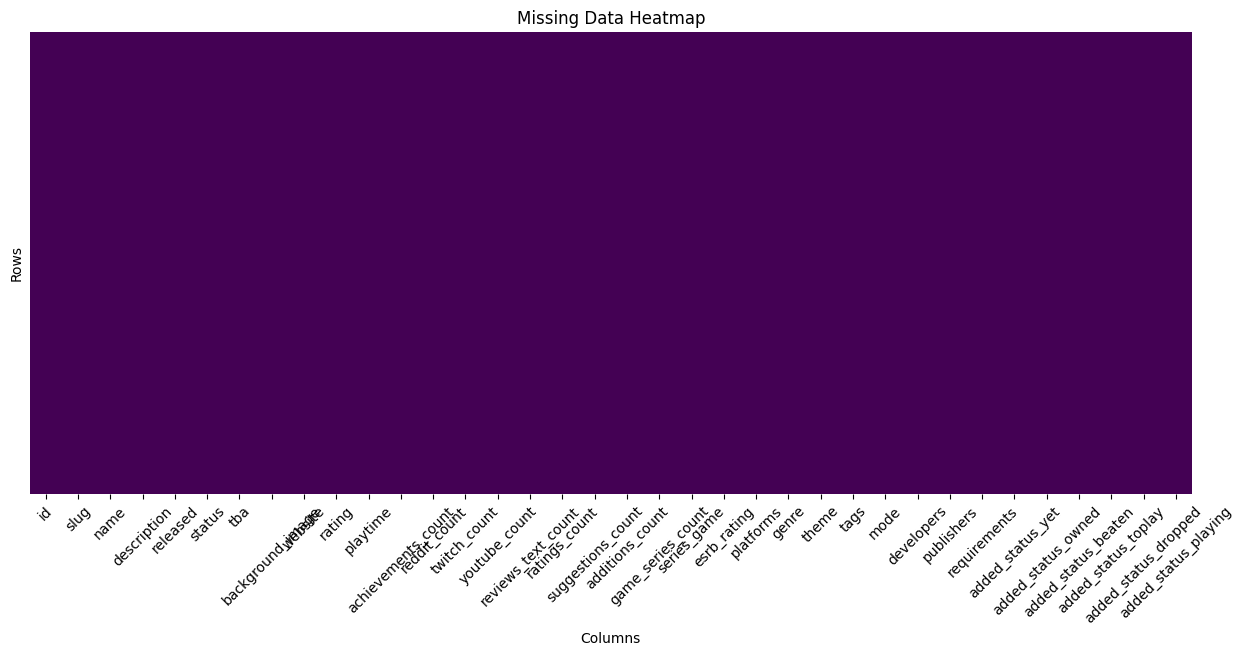

In [3]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45)
plt.show()

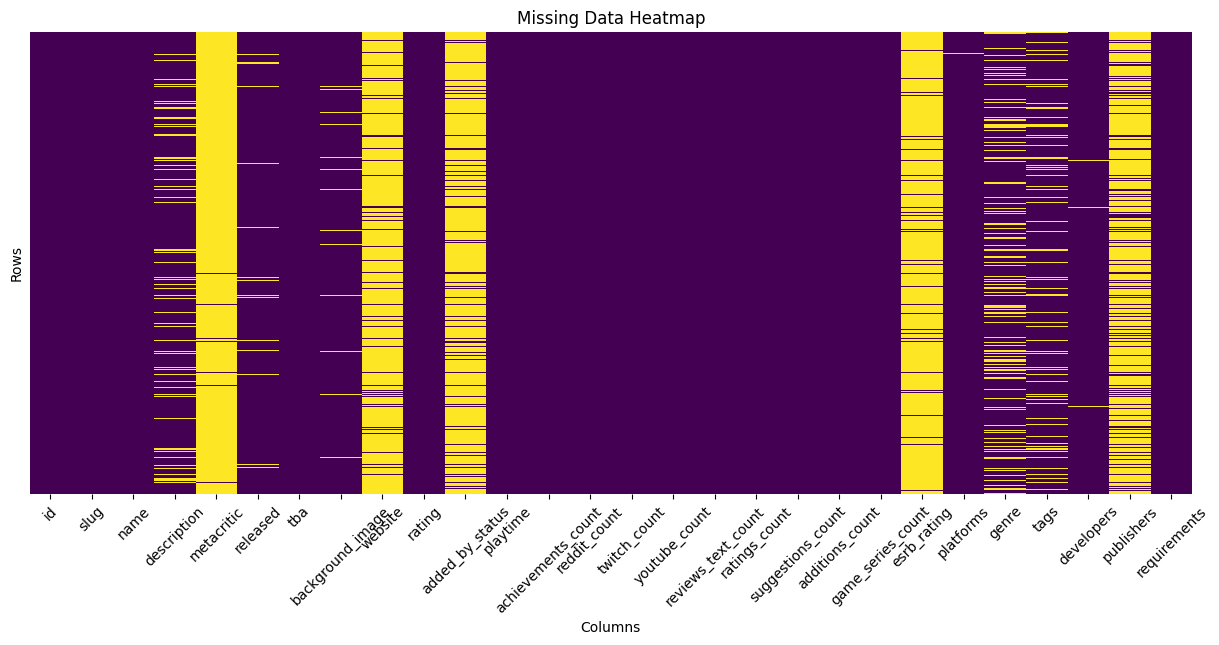

In [9]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45)
plt.show()

### 결측치 있는 행 확인

In [10]:
missing_rows = df[df.isna().any(axis=1)]
print(f"Number of rows with missing values: {len(missing_rows)}")

Number of rows with missing values: 562774


### 결측치 분포 확인

In [11]:
print("Rows with missing data:\n", df[df.isna().any(axis=1)])

Rows with missing data:
             id                     slug                       name  \
0       741344              peace-angel                Peace Angel   
1       374441             brawl-planet               Brawl Planet   
2        97470  obelus-arcade-boss-rush  OBELUS - Arcade Boss Rush   
3       306287       pimple-popper-lite         Pimple Popper Lite   
4       176964            square-square              SQUARE SQUARE   
...        ...                      ...                        ...   
564095  832426          bomb-squad-magn          Bomb Squad (Magn)   
564096  334904         monster-hunter-4           Monster Hunter 4   
564097  419239            escape-plan-b              Escape Plan B   
564098  647986        labyrinth-of-evil          Labyrinth of evil   
564099  312483                  zoxeltd                    ZoxelTD   

                                              description  metacritic  \
0       ２０２０年度１年生特進クラス 中村 桃香さんの作品です。天使を操作し、悪魔から死者を守りつつ...    

### 결측치 유형 추정

In [12]:
import missingno as msno

#### 결측치 패턴 시각화

<Axes: >

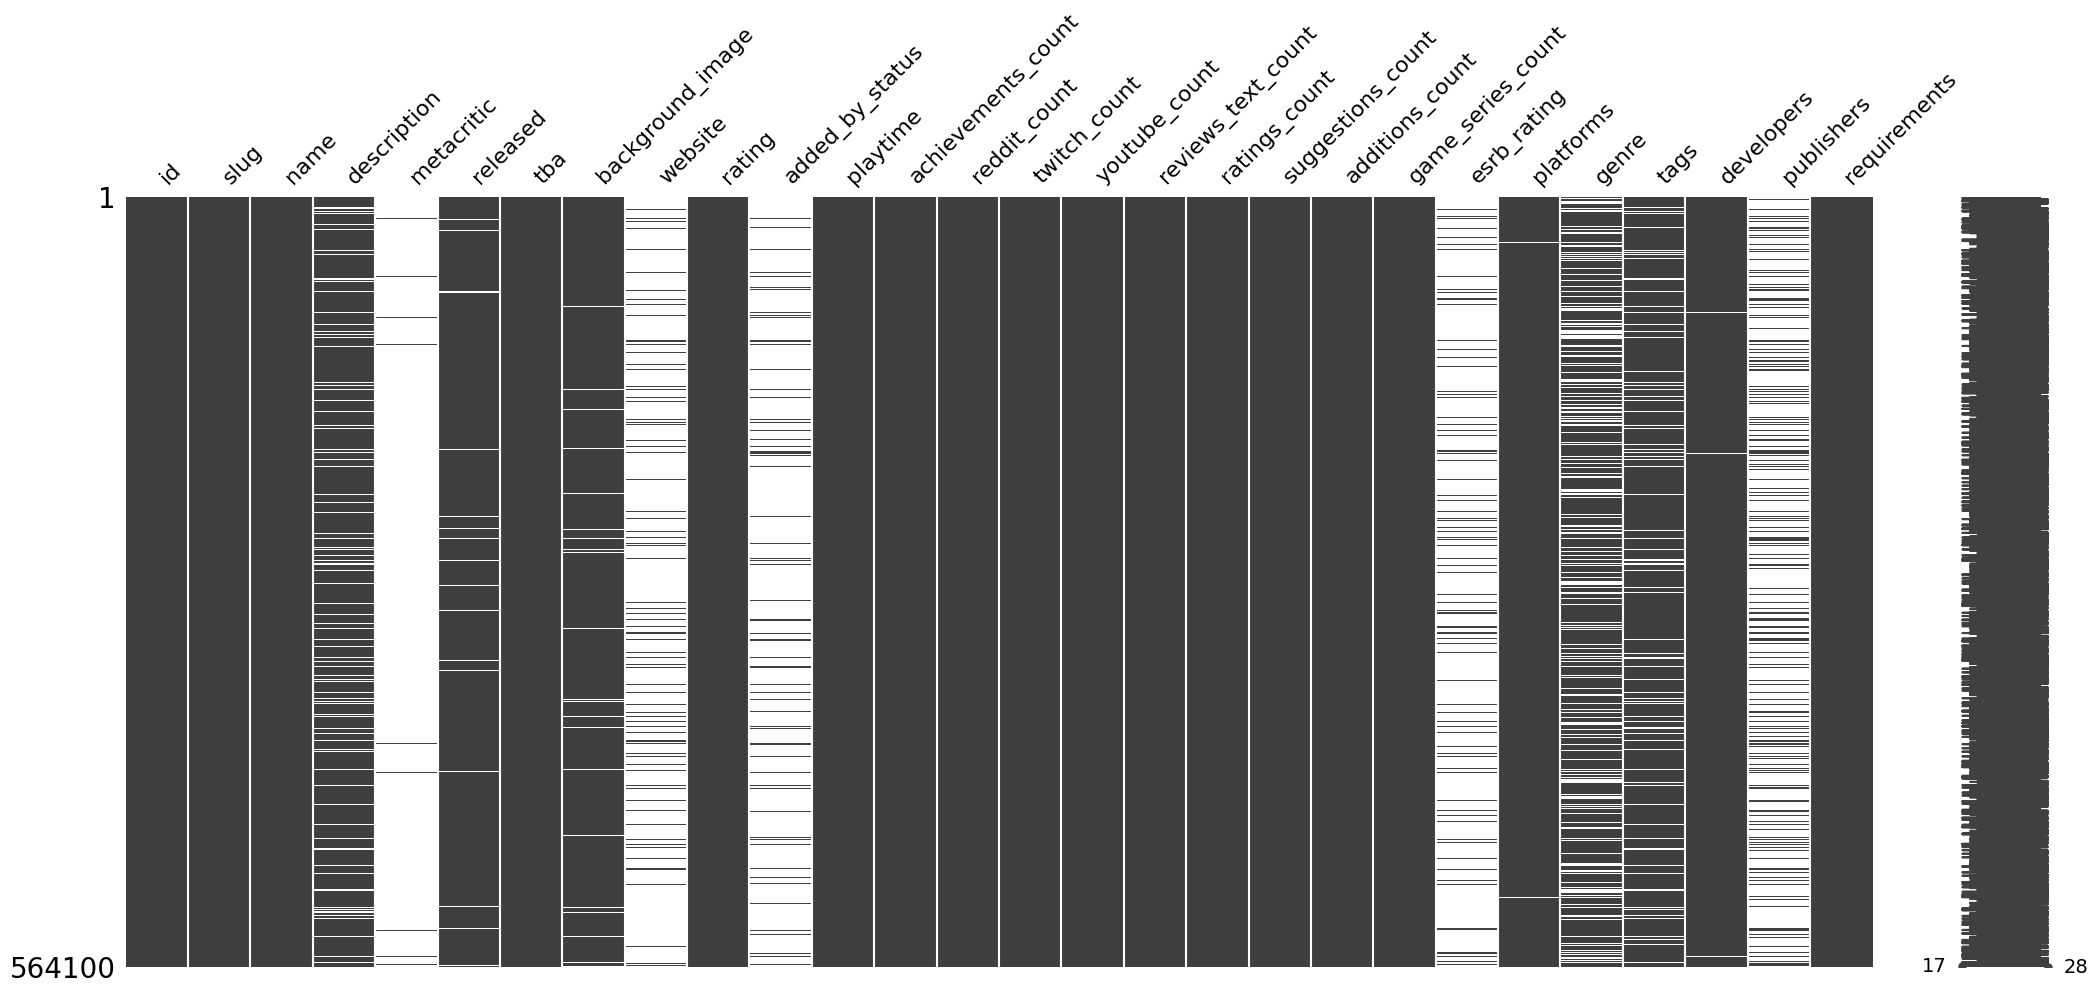

In [13]:
msno.matrix(df)

#### 결측치가 발생하는 변수를 기준으로 막대 그래프를 표시

<Axes: >

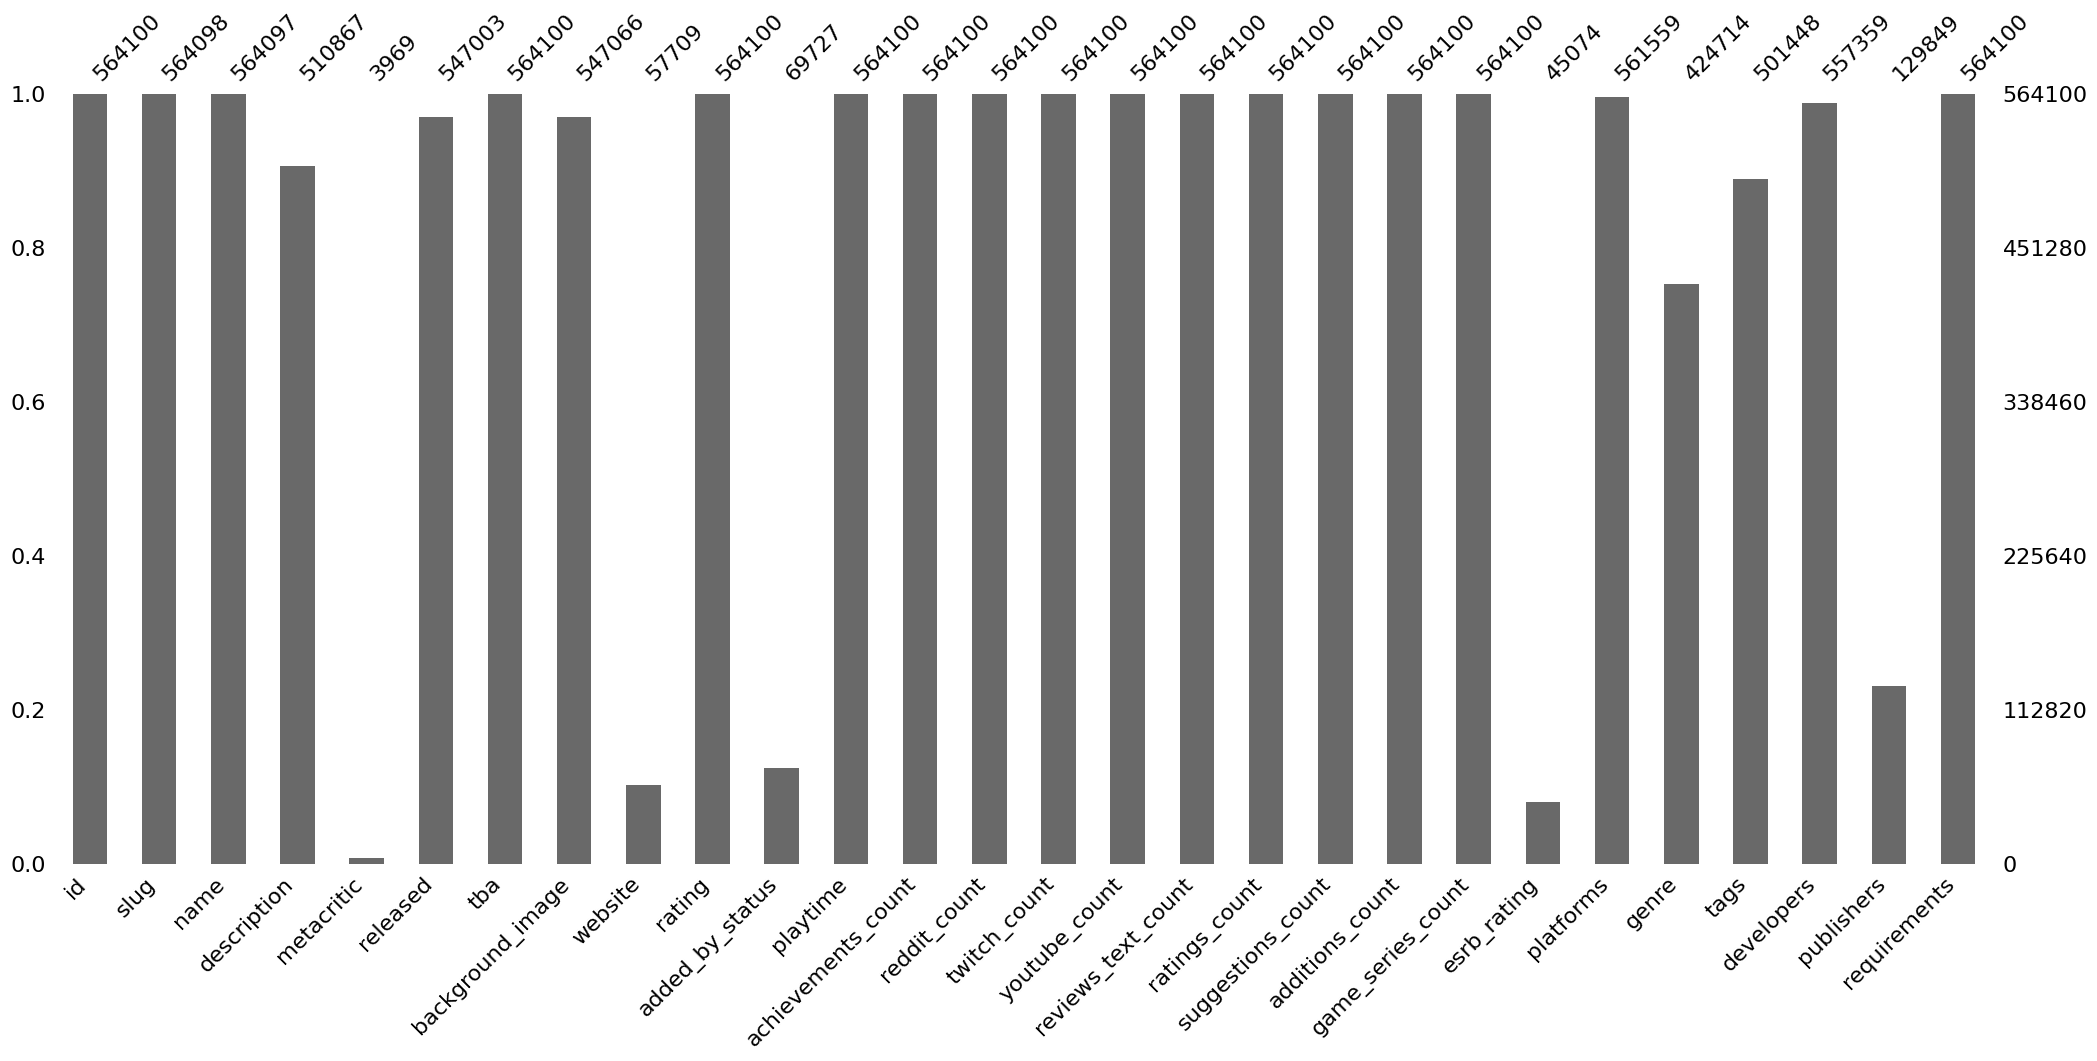

In [14]:
msno.bar(df)

#### 각 변수 간 결측치가 발생하는 패턴을 열 지도 형태로 표시

<Axes: >

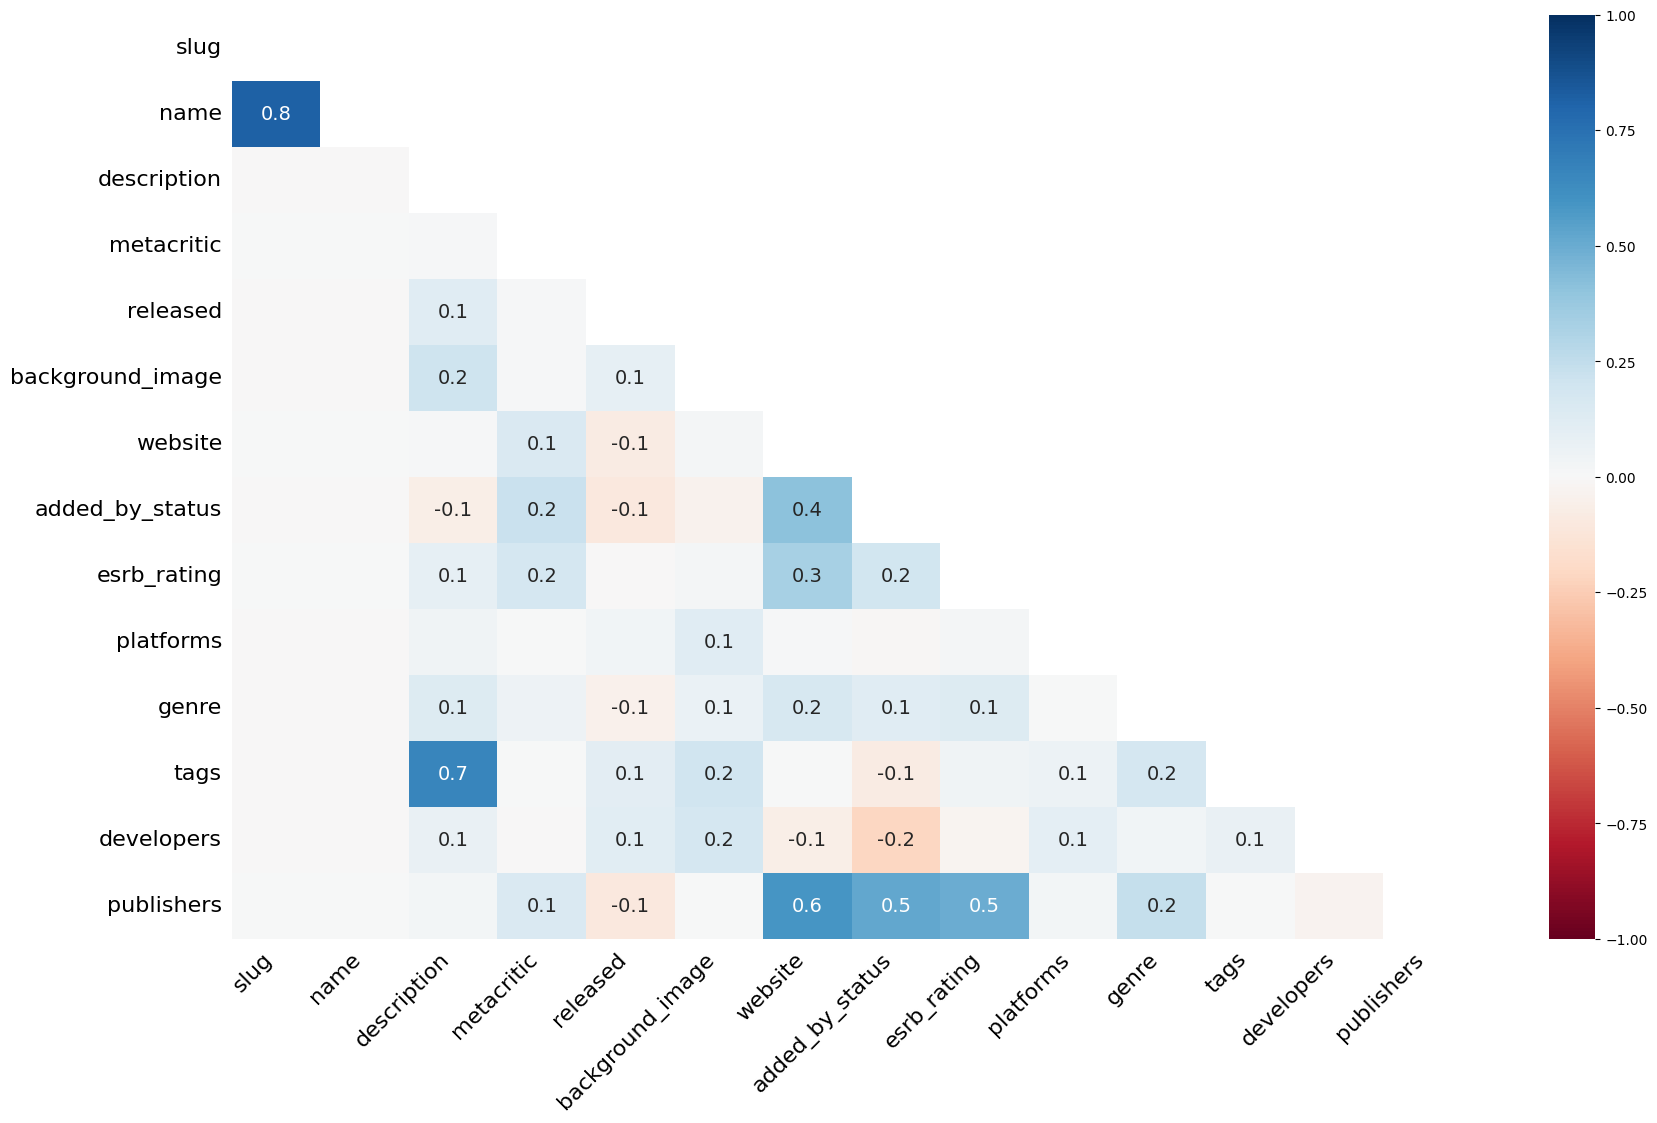

In [15]:
msno.heatmap(df)

### 결측치 유형 파악

In [16]:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                           id  metacritic       tba    rating  playtime  \
id                  1.000000    0.013285  0.008679 -0.168980 -0.043254   
metacritic          0.013285    1.000000  0.000648  0.412272  0.080796   
tba                 0.008679    0.000648  1.000000  0.005253  0.002199   
rating             -0.168980    0.412272  0.005253  1.000000  0.104675   
playtime           -0.043254    0.080796  0.002199  0.104675  1.000000   
achievements_count -0.044534    0.109545 -0.000645  0.057743  0.030149   
reddit_count       -0.027625    0.182910  0.012363  0.163750  0.051746   
twitch_count       -0.099471    0.271479 -0.000061  0.537352  0.093646   
youtube_count      -0.106589    0.246271 -0.001334  0.396221  0.085993   
reviews_text_count -0.044270    0.237157  0.000807  0.258725  0.072797   
ratings_count      -0.051604    0.274925 -0.000928  0.265840  0.073053   
suggestions_count  -0.226926   -0.038209  0.017587  0.322023  0.091396   
additions_count  

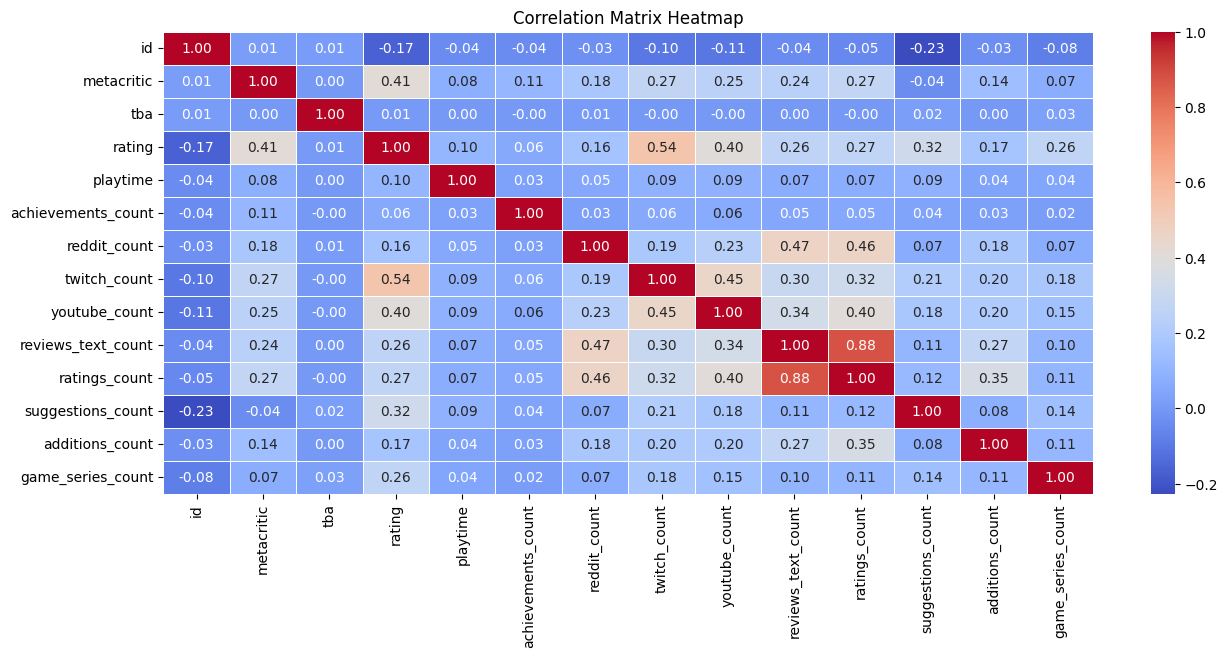

In [17]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- 변수 간 상관관계 해석
    - 높은 상관관계
        - reviews_text_count와 ratings_count 간에는 강한 양의 상관관계가 보인다.
        - 리뷰 텍스트 수가 많을수록 평점 수도 많다.
    - 중간 정도 상관관계
        - twitch_count와 rating 사이의 중간 정도 상관관계는 트위치에서의 인기가 게임 평가에 영향을 줄 수 있음을 나타낸다.
    - 낮은 상관관계
        - id 변수는 다른 변수와 낮은 상관관계를 나타내며, 게임 식별용 고유 번호로서 분석에 큰 영향이 없음을 알 수 있다.